# Environmental Spatial Data Analysis

# Lecture 8

# Joint probability distribution

Joint cumulative distribution function

$$F_{X,Y}(x,y) = P(X \leq x, Y \leq y)$$

Joint probability mass function (discrete RV)

$$p_{X,Y}(x,y) = P(X = x, Y = y)$$

Joint probability density function (continuous RV)

$$f_{X,Y}(x,y) = \frac{\partial^2 F_{X,Y}(x,y)}{\partial x \partial y}$$

# Bivariate Gaussian example

$$f_{X,Y} = \frac{1}{2\pi\sqrt{\sigma_X^2\sigma_Y^2(1-\rho^2)}}\exp\left({-\frac{1}{2(1-\rho^2)}\left[\frac{(x-\mu_X)^2}{\sigma^2_X} + \frac{(y-\mu_Y)^2}{\sigma^2_Y} - \frac{2\rho(x-\mu_X)(y-\mu_Y)}{\sigma_X\sigma_Y}\right]}\right)$$

Where $\mu_X$ and $\mu_Y$ are the means or expectations of $X$ and $Y$, $\sigma^2_X$ and $\sigma^2_Y$ are the variances of $X$ and $Y$, and $\rho$ is the linear correlation (Pearson correlation) between $X$ and $Y$.

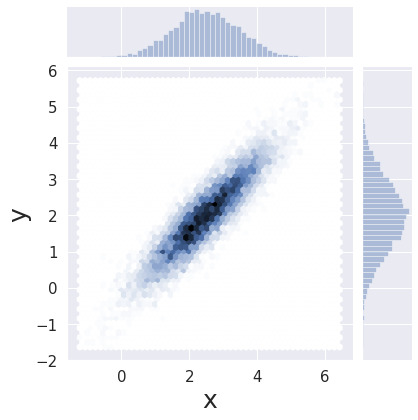

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
sns.set(rc={'axes.labelsize':25,
            'figure.figsize':(15.0, 15.0),
            'xtick.labelsize':15,
            'ytick.labelsize':15})
mu = np.array([2.5,2.0])
cov = np.array([[1.0,0.9],[0.9,1.0]])
X = np.random.multivariate_normal(mu,cov, 10000)
df = pd.DataFrame(data={'x':X[:,0],'y':X[:,1]})
sns.jointplot(x='x', y='y',data=df,kind='hex')
plt.show()

# Conditional distribution

A conditional distribution is the distribution of a random variable given some evidence.

$P(X=x|Y=y)$ is the probability that $X=x$ when $Y=y$.

$P(X=x|Y=y)$ is a different distribution for each value of $y$.

Example (completely made up): 

$$P(X=\text{hit gold}) = 0.001$$

$$P(X=\text{hit gold}|Y=\text{gold mine}) = 0.1$$


# Independence

When $X$ and $Y$ are independent random variables, then we know that:

$$P(X=x|Y=y) = P(X=x)$$

# Conditional probability (Discrete RVs)

By definition:

$$P(X=x|Y=y) = \frac{P(X=x,Y=y)}{P(Y=y)}$$

Back to our example, let's suppose that we know that:

$$P(X=\text{hit gold},Y=\text{gold mine}) = 0.02$$

And that: 

$$P(Y=\text{gold mine}) = 0.2 $$

Then it follows that:

$$P(X=\text{hit gold}|Y=\text{gold mine}) = \frac{0.02}{0.2} =  0.1$$

# Conditional probability (Continuous RVs)

$$f_{X|Y}(x,y) = \frac{f_{X,Y}(x,y)}{f_Y(y)}$$

Although generally, you will just see this:

$$f_{X|Y} = \frac{f_{X,Y}}{f_Y}$$

# Chain rule

The definition of conditional probability leads us to the chain rule, which in turn allows us to define the joint distribution as a product of conditionals:

$$P(X,Y) = P(X,Y)\frac{P(Y)}{P(Y)} = P(X|Y)P(Y)$$

In general then,

$$P(X_1,...,X_N) = \prod_{k=1}^NP(X_k|X_1,...,X_{k-1})$$


# Marginalization (Discrete random variables)

Given a joint distribution, we are often only interested in a subset of the random variables. To "remove" random variables from the distribution, we can use marginalization.

$$P(X=x) = \sum_{y}^nP(X=x,Y=y)$$
$$P(Y=y) = \sum_{x}^mP(X=x,Y=y)$$

| X/Y | X=no gold | X=hit gold |P(Y)|
| -- | --| -- | -- |
| **Y=gold mine** | 0.18  | 0.02 | **0.2** |
| **Y=not gold mine** | 0.79 | 0.01 | **0.8**|
| **P(X)**   | **0.97** | **0.03**|

# Marginalization (Continous random variables)

$$f_X(x) = \int_{-\infty}^{\infty}f_{X,Y}(x,y)dy$$

$$f_Y(y) = \int_{-\infty}^{\infty}f_{X,Y}(x,y)dx$$


# Marginal vs. conditional distribution

The **marginal probability** is the probability of a single event occurring, independent of other events.

The **conditional probability** is the probability that an event occurs given that another specific event has already occurred.

# Intuituion: Marginal vs. conditional

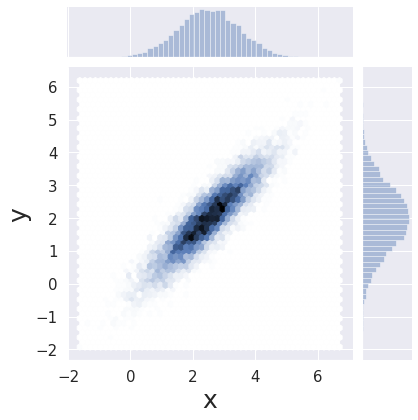

* What are the "side" plots?
* How would the conditional $f_{X|Y=0}$ compare to $f_{X}$?

In [4]:
import netCDF4 as nc    
import datetime
sites = {'seattle':{'lat':47.6062,'lon':-122.3321},
         'paris':{'lat':48.8566,'lon':2.3522},
         'santiago':{'lat':-33.4489,'lon':-70.6693}}
file = '/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc'
fp = nc.Dataset(file)
lats = fp['lat'][:]
lons = fp['lon'][:]
times = fp['time']
for site in sites:
    lat = sites[site]['lat']
    lon = sites[site]['lon']
    if lon < 0:lon = 360 + lon
    sites[site]['ilat'] = int(np.argmin(np.abs(lats - lat)))
    sites[site]['ilon'] = int(np.argmin(np.abs(lons - lon)))
var = 't2m'
#Iterate through all the sites
for site in sites:
    #Extract the data for the given site
    ilat = sites[site]['ilat']
    ilon = sites[site]['ilon']
    sites[site][var] = fp[var][:,ilat,ilon]
#Convert the dates to a datetime array
dates = nc.num2date(times[:],units=times.units,calendar=times.calendar)

# Going back to our 3 city example (again)

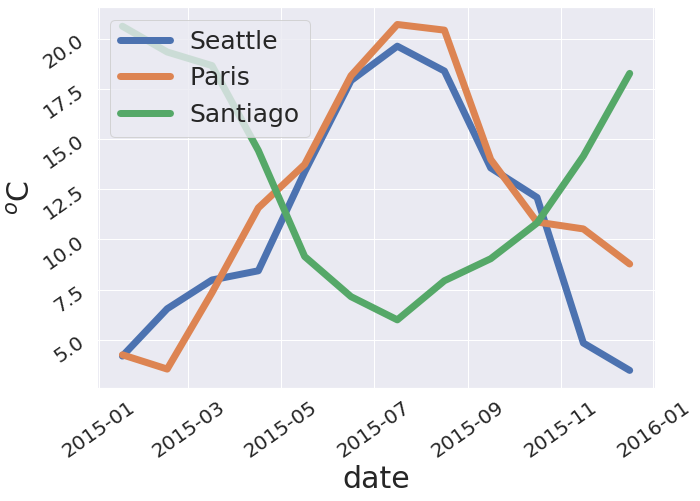

In [5]:
#Calculate the Boolean mask for dates within 2015
m = (dates >= datetime.datetime(2015,1,1)) & (dates <= datetime.datetime(2015,12,31))
#Assemble the subsetted dates array
dates_subset = dates[m]

plt.figure(figsize=(10,7))
plt.plot(dates_subset,sites['seattle']['t2m'][m],lw=7)
plt.plot(dates_subset,sites['paris']['t2m'][m],lw=7)
plt.plot(dates_subset,sites['santiago']['t2m'][m],lw=7)
plt.xticks(fontsize=20,rotation=35)
plt.yticks(fontsize=20,rotation=35)
plt.xlabel('date',fontsize=30)
plt.ylabel(r'$^o$C',fontsize=30)
plt.grid('on')
plt.legend(['Seattle','Paris','Santiago'],fontsize=25)
plt.show()

# Let's focus on Paris vs. Seattle

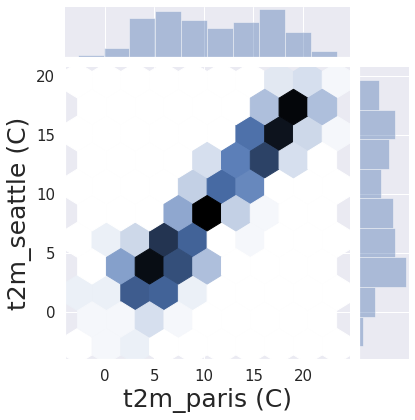

In [20]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
sns.set(rc={'axes.labelsize':25,
            'figure.figsize':(15.0, 15.0),
            'xtick.labelsize':15,
            'ytick.labelsize':15})
df = pd.DataFrame(data={'t2m_paris (C)':sites['paris']['t2m'],'t2m_seattle (C)':sites['seattle']['t2m']})
sns.jointplot(x='t2m_paris (C)', y='t2m_seattle (C)',data=df,kind='hex')
plt.show()

# Let's try to fit a multivariate gaussian for this site

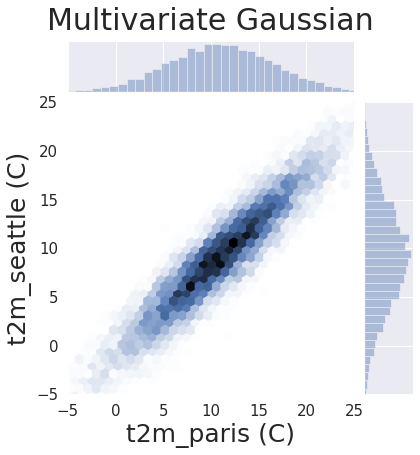

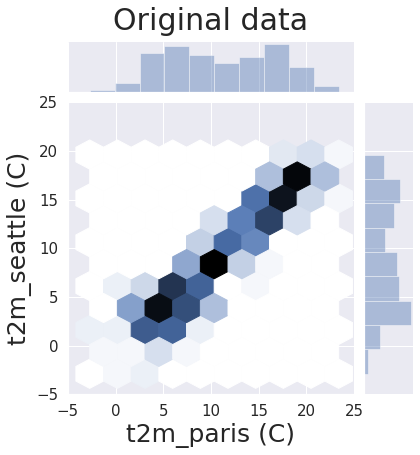

In [6]:
#Vector of means
mu = [np.mean(sites['paris']['t2m']),np.mean(sites['seattle']['t2m'])]
#Covariance matrix
cov = np.cov(sites['paris']['t2m'],sites['seattle']['t2m'])
sns.set_style('darkgrid')
sns.set(rc={'axes.labelsize':25,
            'figure.figsize':(15.0, 15.0),
            'xtick.labelsize':15,
            'ytick.labelsize':15})
#Draw 10,000 samples from the distribution
#Multivariate Gaussian
X = np.random.multivariate_normal(mu,cov, 10000)
df = pd.DataFrame(data={'t2m_paris (C)':X[:,0],'t2m_seattle (C)':X[:,1]})
sns.jointplot(x='t2m_paris (C)', y='t2m_seattle (C)',data=df,kind='hex',xlim=(-5,25),ylim=(-5,25))
plt.suptitle('Multivariate Gaussian',y=1.05,fontsize=30)
plt.show()
#Original
df = pd.DataFrame(data={'t2m_paris (C)':sites['paris']['t2m'],'t2m_seattle (C)':sites['seattle']['t2m']})
sns.jointplot(x='t2m_paris (C)', y='t2m_seattle (C)',data=df,kind='hex',xlim=(-5,25),ylim=(-5,25))
plt.suptitle('Original data',y=1.05,fontsize=30)
plt.show()

When we compare the marginals what do we notice?

# Transformations (Quantile mapping)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Histogram_matching.PNG/440px-Histogram_matching.PNG" width="700">

# Example 1 (Original to Uniform)

In [7]:
import sklearn.preprocessing
seattle_t2m_uniform = sklearn.preprocessing.quantile_transform(sites['seattle']['t2m'][:,np.newaxis],
                                                               output_distribution='uniform',
                                                               random_state=0,
                                                               copy=True,n_quantiles=sites['seattle']['t2m'].size)
paris_t2m_uniform = sklearn.preprocessing.quantile_transform(sites['paris']['t2m'][:,np.newaxis],
                                                             output_distribution='uniform',
                                                             random_state=0,
                                                             copy=True,n_quantiles=sites['paris']['t2m'].size)

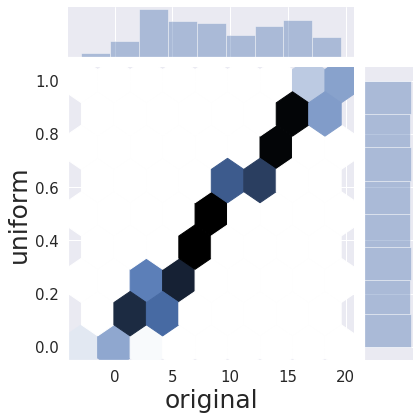

In [8]:
df = pd.DataFrame(data={'original':sites['seattle']['t2m'],'uniform':seattle_t2m_uniform[:,0]})
sns.jointplot(x='original', y='uniform',data=df,kind='hex')
plt.show()

# Comparing uniforms instead of original data

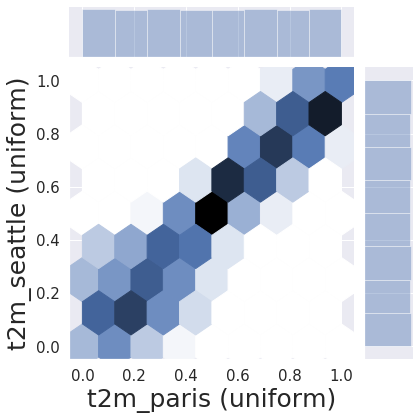

In [66]:
df = pd.DataFrame(data={'t2m_paris (uniform)':paris_t2m_uniform[:,0],'t2m_seattle (uniform)':seattle_t2m_uniform[:,0]})
sns.jointplot(x='t2m_paris (uniform)', y='t2m_seattle (uniform)',data=df,kind='hex')
plt.show()

# We could also transform all the data to standard gaussian

In [9]:
seattle_t2m_gaussian = sklearn.preprocessing.quantile_transform(sites['seattle']['t2m'][:,np.newaxis],
                                                               output_distribution='normal',
                                                               random_state=0,
                                                               copy=True,n_quantiles=sites['seattle']['t2m'].size)
paris_t2m_gaussian = sklearn.preprocessing.quantile_transform(sites['paris']['t2m'][:,np.newaxis],
                                                             output_distribution='normal',
                                                             random_state=0,
                                                             copy=True,n_quantiles=sites['paris']['t2m'].size)

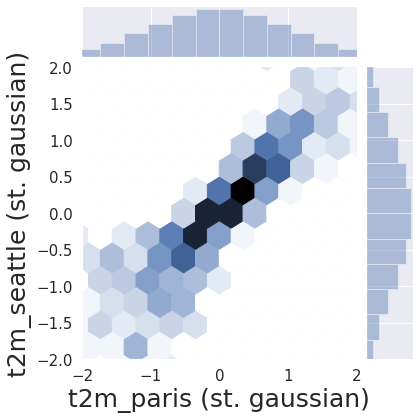

In [11]:
df = pd.DataFrame(data={'t2m_paris (st. gaussian)':paris_t2m_gaussian[:,0],'t2m_seattle (st. gaussian)':seattle_t2m_gaussian[:,0]})
sns.jointplot(x='t2m_paris (st. gaussian)', y='t2m_seattle (st. gaussian)',data=df,kind='hex',xlim=(-2,2),ylim=(-2,2))
plt.show()

# Copulas

This idea of transforming our data to a simple parametric distribution and then "coupling" the two through their covariance matrix gives you insight into what [Copulas](https://en.wikipedia.org/wiki/Copula_(probability_theory)#:~:text=In%20probability%20theory%20and%20statistics,the%20dependence%20between%20random%20variables.) are doing.

<img src="https://bochang.me/blog/posts/copula/normal_plots.png" width="700">

I have already saturated you with this concept so we are going to move on. However, if you are interested, feel free to read up on them. They are very useful tools to quantify risk. 

**Trivia: Copulas were an important culprit behind the financial crash of 2008 (look it up!). So as with all modeling tools, be very careful... The extremes are what matter most and what we capture the worst.**

# Bayes Rule

$$P(X|Y) = \frac{P(Y|X)P(X)}{P(Y)}$$

$$P(Y) > 0$$

* $P(X|Y)$: Posterior distribution
* $P(Y|X)$: Likelihood function
* $P(X)$: Prior (degree of belief about $X$ before experiment.
* $P(Y)$: Normalizing constant

# Bayes rule: Water-well yield

**Example from Schuenemeyer and Drew, 2010**

$$P(X=\text{high yield well}| Y=\text{rock type Ygt}) = \frac{P(Y=\text{rock type Ygt}|X=\text{high yield well})P(X=\text{high yield well})}{P(Y=\text{rock type Ygt})}$$

* Based on previous data, we estimate the prior for the entire domain (not just rock type Ygt) to be:

$$P(X=\text{high yield well}) = 0.06$$

* A geologic map tells us that 20% of the domain is rock type Ygt. Thus:

$$P(Y=\text{rock type Ygt}) = 0.2$$

* A number of wells are drilled in the area, from which it is estimated that:

$$P(Y=\text{rock type Ygt}|X=\text{high yield well}) = 0.5$$

* Thus:

$$P(X=\text{high yield well}| Y=\text{rock type Ygt}) = 0.15$$

* What would we suggest for future drilling?

# Seems simple, right?

The reality is that Bayesian statistics typically involves using probability distributions rather than point probabilities as in the previous example. This makes the problem more challenging (yet interesting).

# Using distributions instead...

<img src="https://www.researchgate.net/profile/Hideyoshi_Yanagisawa2/publication/330577376/figure/fig1/AS:718458304086017@1548305216392/Example-of-Bayesian-inference-with-a-prior-distribution-a-posterior-distribution-and.png" width="700">


# Bayesian statistics

Overaching goal of Bayesian statistics is to represent prior uncertainty about model parameters with a probability distribution and to update this prior uncertainty with current data to produce a posterior probability distribution for the parameter that contains less uncertainty.

$$f(\theta|\text{data}) = \frac{f(\text{data}|\theta) f(\theta)}{f(\text{data})}$$


* $f(\theta)$: Prior distribution of the model parameters
* $f(\theta|\text{data})$: Posterior distribution of the model parameters
* $f(\text{data}|\theta)$: Likelihood function
* $f(\text{data})$: Marginal distribution

A simpler way to think of this:

$$\text{Posterior} \propto \text{Likelihood} \times \text{Prior}$$ 

# Example: PDF of elevation in Durham, NC vs NC

# Priors matter...

<img src="https://www.researchgate.net/publication/304033579/figure/fig2/AS:391240878182466@1470290502662/Principles-of-Bayesian-inference-A-A-prior-belief-knowledge-expectation-or.png" width="700">


